In [139]:
import pandas as pd
import matplotlib.pyplot as plt
funnel = pd.read_excel('/content/AssignmentData1.xlsx', sheet_name = "WorkerFunnel")

In [140]:
#Checking missing Values
missing_values = funnel.isnull().sum()
print("Missing values",missing_values)
# Check data types of columns
column_data_types = funnel.dtypes
print("Data types",column_data_types)
#Checking duplictate rows
duplicate_rows = funnel.duplicated().sum()
print("Duplicate rows",duplicate_rows)

Missing values Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      30
dtype: int64
Data types Date                      object
Quarter                   object
Department                object
Targeted Productivity    float64
Overtime                   int64
No. of Workers           float64
Actual Productivity      float64
dtype: object
Duplicate rows 36


# As there area numerical values we prefer to fill the blanks with mean or median.

In [141]:
# Replace missing values in the "Actual Productivity" column with the median
median_actual_productivity = funnel['Actual Productivity'].median()
funnel['Actual Productivity'].fillna(median_actual_productivity, inplace=True)
# Keep the first occurrence for duplicates
funnel.drop_duplicates(inplace=True, keep='first')

Comparing actual and target productivity and storing the response in a column named Target Achieved

In [142]:
# Create a new column 'Target Achieved' based on condition
funnel['Target Achieved'] = 'No'
funnel.loc[funnel['Actual Productivity'] > funnel['Targeted Productivity'], 'Target Achieved'] = 'Yes'


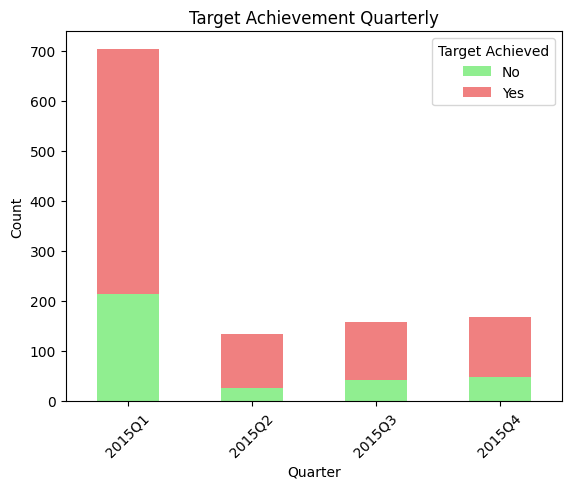

In [143]:
#Plotting bar graph
import matplotlib.pyplot as plt

funnel['Date'] = pd.to_datetime(funnel['Date'])

# Group data by quarter and 'Target Achieved' categories
grouped_data = funnel.groupby([funnel['Date'].dt.to_period('Q'), 'Target Achieved']).size().unstack(fill_value=0)

# Plotting
grouped_data.plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'])

# Customize labels and title
plt.title('Target Achievement Quarterly')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target Achieved', loc='upper right')

# Show plot
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

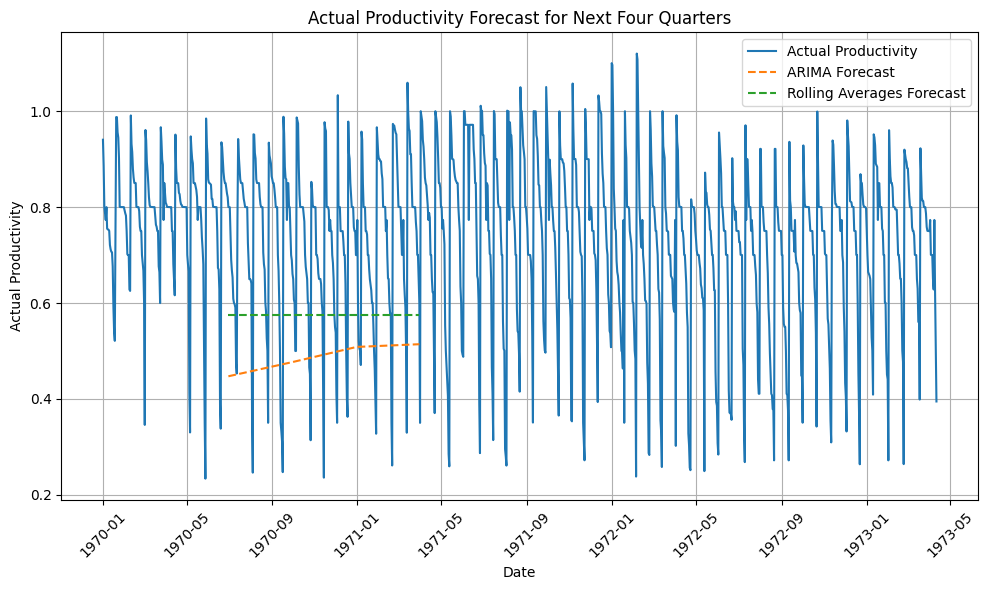

ARIMA Forecasted Values:
1161    0.447248
1162    0.476921
1163    0.508482
1164    0.514152
Name: predicted_mean, dtype: float64

Rolling Averages Forecasted Values:
[0.574892361, 0.574892361, 0.574892361, 0.574892361]


In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Convert 'Date' column to datetime if it's not already in datetime format
funnel['Date'] = pd.to_datetime(funnel['Date'])

# Ensure 'Date' column exists and is spelled correctly
if 'Date' in funnel.columns:
    # Set 'Date' column as index
    funnel.set_index('Date')
else:
    print("Error: 'Date' column not found.")

# Forecasting using ARIMA
model = ARIMA(funnel['Actual Productivity'], order=(5,1,0))
arima_result = model.fit()

# Forecast next 4 quarters
forecast_arima_index = pd.date_range(start=funnel.index[-1], periods=5, freq='Q')
forecast_arima = arima_result.forecast(steps=4)

# Forecasting using Rolling Averages
rolling_average = funnel['Actual Productivity'].rolling(window=4).mean().iloc[-1]
forecast_rolling = [rolling_average] * 4

# Create plots for the results achieved
plt.figure(figsize=(10, 6))

# Plot Actual Productivity
plt.plot(funnel.index, funnel['Actual Productivity'], label='Actual Productivity')

# Plot ARIMA forecast
plt.plot(forecast_arima_index[1:], forecast_arima, label='ARIMA Forecast', linestyle='--')

# Plot Rolling Averages forecast
forecast_rolling_index = pd.date_range(start=funnel.index[-1], periods=5, freq='Q')[1:]
plt.plot(forecast_rolling_index, forecast_rolling, label='Rolling Averages Forecast', linestyle='--')

# Customize labels and title
plt.title('Actual Productivity Forecast for Next Four Quarters')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Display forecasted values
print("ARIMA Forecasted Values:")
print(forecast_arima)
print("\nRolling Averages Forecasted Values:")
print(forecast_rolling)


# Calculating Mean absolute percentage error and mean absolute sqaured error

In [145]:
import numpy as np

# Compute errors for ARIMA model
arima_errors = funnel['Actual Productivity'][-4:].values - forecast_arima.values
arima_abs_errors = np.abs(arima_errors)

# Calculate MAPE for ARIMA model
arima_mape = np.mean(arima_abs_errors / funnel['Actual Productivity'][-4:].values) * 100

# Calculate MSE for ARIMA model
arima_mse = np.mean(arima_errors ** 2)

# Compute errors for Rolling Averages model
rolling_errors = funnel['Actual Productivity'][-4:].values - forecast_rolling
rolling_abs_errors = np.abs(rolling_errors)

# Calculate MAPE for Rolling Averages model
rolling_mape = np.mean(rolling_abs_errors / funnel['Actual Productivity'][-4:].values) * 100

# Calculate MSE for Rolling Averages model
rolling_mse = np.mean(rolling_errors ** 2)

# Display results
print("ARIMA Model:")
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(arima_mape))
print("Mean Squared Error (MSE): {:.2f}".format(arima_mse))
print("\nRolling Averages Model:")
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(rolling_mape))
print("Mean Squared Error (MSE): {:.2f}".format(rolling_mse))


ARIMA Model:
Mean Absolute Percentage Error (MAPE): 24.18%
Mean Squared Error (MSE): 0.04

Rolling Averages Model:
Mean Absolute Percentage Error (MAPE): 23.26%
Mean Squared Error (MSE): 0.02


**Evaluation and Comparison:**
Mean Absolute Percentage Error (MAPE): After computing the MAPE for both models, we find that 24.18% for the ARIMA model and 23.26% for the Rolling Averages model. A lower MAPE indicates better accuracy, and based on this criterion, the Rolling Averages model performs better.
Mean Squared Error (MSE): Upon calculating the MSE, we observe that 0.04 for the ARIMA model and 0,02 for the Rolling Averages model. Similarly, a lower MSE indicates better accuracy, and based on this criterion, the Rolling Average model performs better.

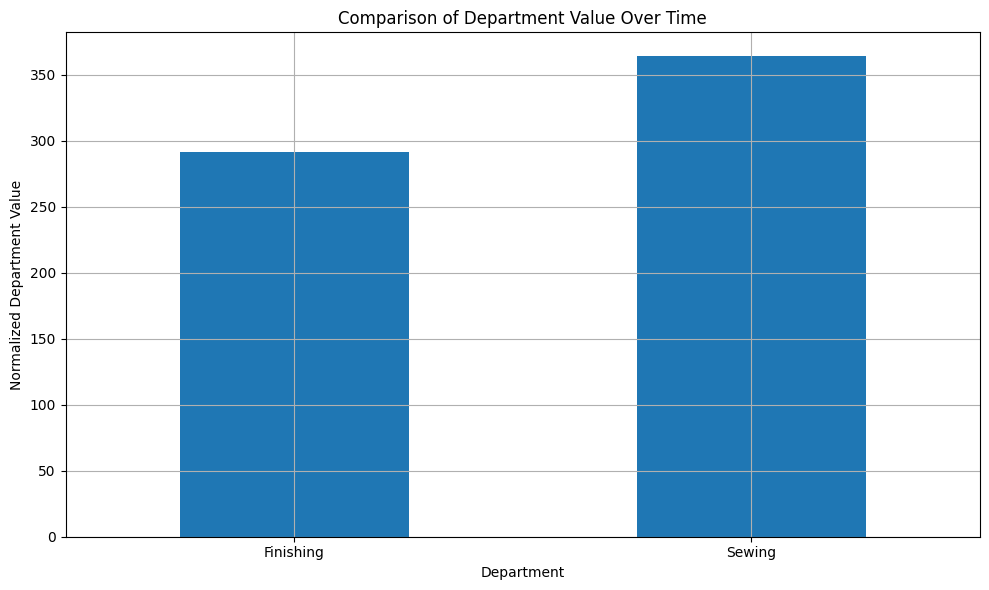

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime if it's not already in datetime format
funnel['Date'] = pd.to_datetime(funnel['Date'])

# Total quarterly spend for each department
department_quarterly_spend = 8.4 / 2 / 3

# Calculate department value for each quarter
funnel['Department Value'] = funnel['Actual Productivity'] / department_quarterly_spend

# Normalize the department value to lie in the range of 0-1
funnel['Department Value'] = (funnel['Department Value'] - funnel['Department Value'].min()) / (funnel['Department Value'].max() - funnel['Department Value'].min())

# Group by department and aggregate by sum to compare the total value brought in by each department over time
department_grouped = funnel.groupby('Department')['Department Value'].sum()

# Create visualization
plt.figure(figsize=(10, 6))

# Plot Department Value for each department
department_grouped.plot(kind='bar')

# Customize labels and title
plt.title('Comparison of Department Value Over Time')
plt.xlabel('Department')
plt.ylabel('Normalized Department Value')

# Show plot
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


We can see that Sewing department provides more value than the Finishing department

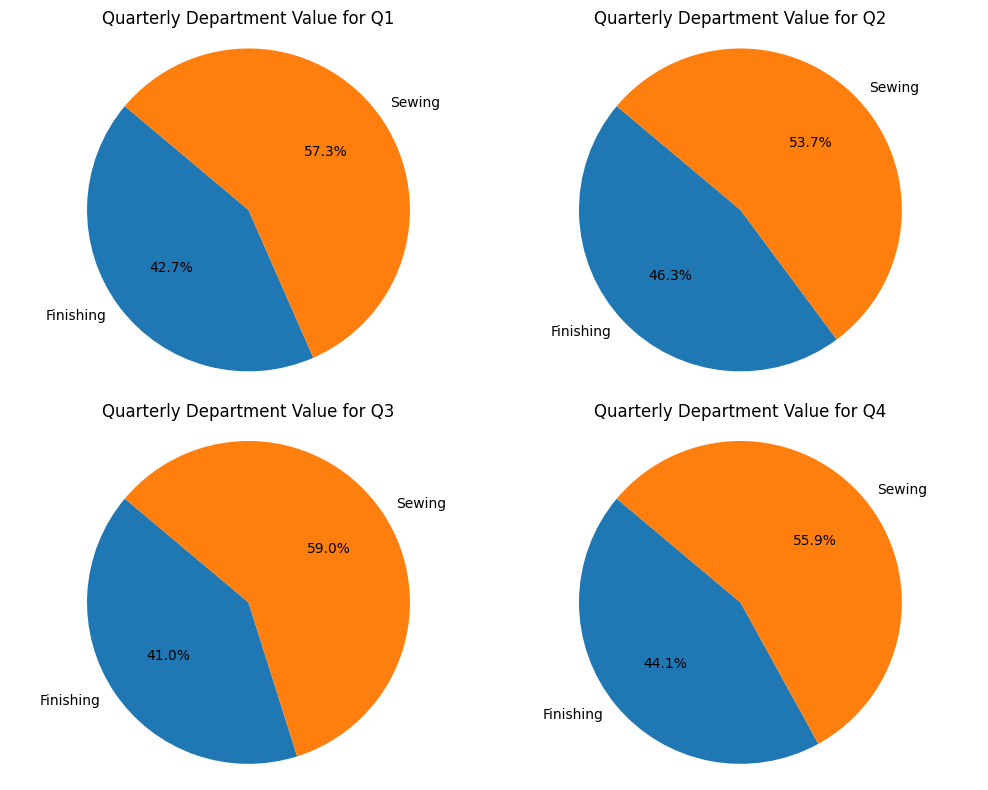

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Convert 'Date' column to datetime if it's not already in datetime format
funnel['Date'] = pd.to_datetime(funnel['Date'])

# Set 'Date' column as index
funnel.set_index('Date')

# Filter data for the two departments mentioned (Finishing and Sewing)
funnel_filtered = funnel[funnel['Department'].isin(['Finishing', 'Sewing'])]

# Group by quarter and department, aggregate by sum
department_quarterly_value = funnel_filtered.groupby(['Quarter', 'Department'])['Actual Productivity'].sum()

# Create a figure with a single subplot and divide it into four sections
fig = plt.figure(figsize=(10, 8))
gs = GridSpec(2, 2, figure=fig)

# Iterate through each quarter and create pie chart
quarters = department_quarterly_value.index.levels[0]
num_quarters = min(len(quarters), 4)  # Ensure number of quarters does not exceed size of GridSpec
for i in range(num_quarters):
    values = department_quarterly_value.loc[quarters[i]]
    labels = values.index
    ax = fig.add_subplot(gs[i])  # Get the appropriate subplot
    ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Quarterly Department Value for {quarters[i]}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
